In [22]:
import sys 
sys.path.append('..')

from models import DIFDensityEstimator,SoftmaxWeight,LocationScaleFlow
from models import EMDensityEstimator
from targets import Target
%load_ext autoreload
%autoreload 2
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


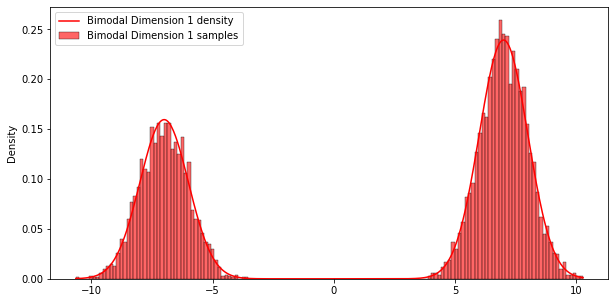

In [23]:
example = "Bimodal Dimension 1"
num_samples = 10000
target = Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

In [25]:
num_samples = target_samples.shape[0]
K = 2
model = DIFDensityEstimator(target_samples, K)
loss0, loss1, loss2 = model.compare_loss()

In [28]:
model.train(100, 100)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.06it/s, loss = 2.092411756515503]


[2.092236280441284,
 2.092496871948242,
 2.0924558639526367,
 2.092270851135254,
 2.0925638675689697,
 2.0922346115112305,
 2.092512607574463,
 2.092385768890381,
 2.092904806137085,
 2.0923707485198975,
 2.0922203063964844,
 2.092338800430298,
 2.0924689769744873,
 2.092571973800659,
 2.0928664207458496,
 2.092402696609497,
 2.0924549102783203,
 2.092336416244507,
 2.0923869609832764,
 2.0922672748565674,
 2.092453718185425,
 2.0927696228027344,
 2.0926942825317383,
 2.09224009513855,
 2.0922207832336426,
 2.0925378799438477,
 2.0923819541931152,
 2.092381715774536,
 2.0923359394073486,
 2.092397928237915,
 2.0924553871154785,
 2.092270612716675,
 2.0924313068389893,
 2.092292308807373,
 2.092294931411743,
 2.092461347579956,
 2.0926151275634766,
 2.0930840969085693,
 2.0924081802368164,
 2.0926449298858643,
 2.092374563217163,
 2.0923194885253906,
 2.0924205780029297,
 2.0924627780914307,
 2.0926339626312256,
 2.0923171043395996,
 2.0922985076904297,
 2.0924155712127686,
 2.092821598

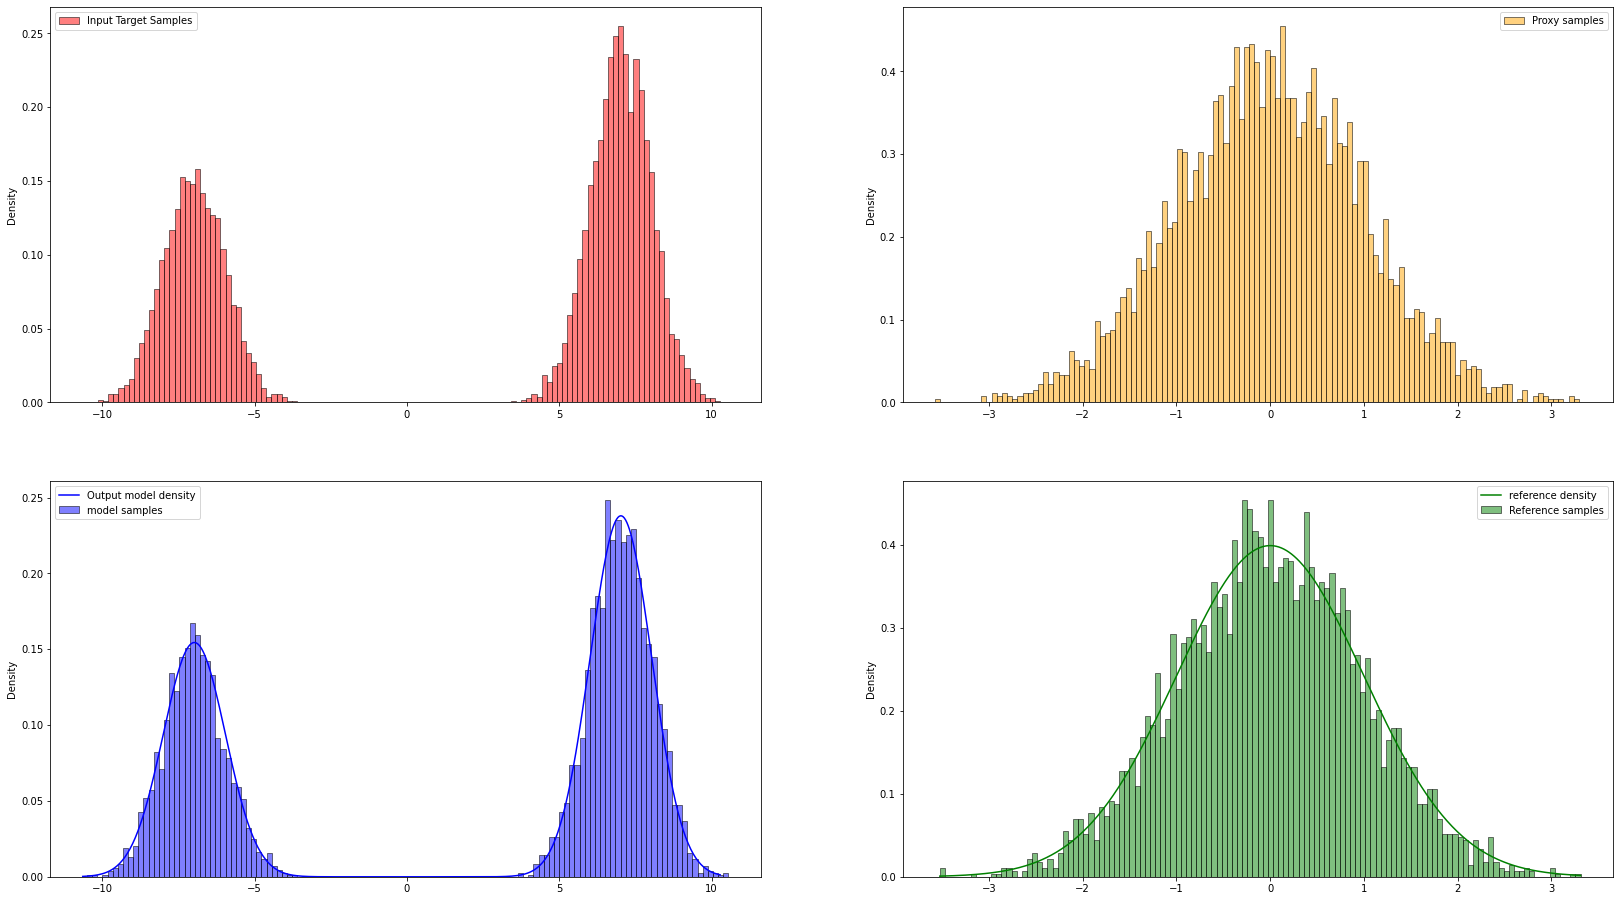

In [30]:
model.model_visual()

In [12]:
print(loss0)
print(loss1)
print(loss2)

tensor(2.1863, grad_fn=<NegBackward0>)
tensor(2.1863, grad_fn=<NegBackward0>)
tensor(2.1863, grad_fn=<NegBackward0>)


In [16]:
model.optimizer.zero_grad()
loss0.backward(retain_graph = True)
grad0 =model.para_list[2].grad
model.optimizer.zero_grad()
loss1.backward(retain_graph = True)
grad1 =model.para_list[2].grad
model.optimizer.zero_grad()
loss2.backward(retain_graph = True)
grad2=model.para_list[2].grad

In [21]:
print((grad1-grad0).norm())
print((grad2-grad0).norm())

tensor(0.)
tensor(0.)
